# Instalação de pacotes e configurações

In [7]:
%pip install geopandas
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install descartes 
%pip install openpyxl

     -------------------------------------- 250.0/250.0 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importando o arquivo e suas páginas.


In [8]:
# Importa o arquivo Excel com suas páginas VENDAS e PRODUTOS
frame_df = pd.read_excel('Base-Dados-Desafio-D&A-01.xlsx',sheet_name=['VENDAS','PRODUTOS'])
sales_df = frame_df.get('VENDAS')
products_df = frame_df.get('PRODUTOS')

# Mostra a tabela principal com suas páginas 
frame_df

{'VENDAS':     CLIENTE  IDADE             ESTADO PRODUTO  QUANTIDADE_VENDIDA       DATA
 0         1     47     SANTA CATARINA       A                  64 2021-01-05
 1         1     47     SANTA CATARINA       B                 488 2021-01-15
 2         1     47     SANTA CATARINA       C                 420 2021-01-25
 3         1     47     SANTA CATARINA       D                 259 2021-02-04
 4         1     47     SANTA CATARINA       E                 387 2021-02-14
 5         2     61          SÃO PAULO       A                 302 2021-02-24
 6         2     61          SÃO PAULO       B                 117 2021-03-06
 7         2     61          SÃO PAULO       C                 344 2021-03-16
 8         2     61          SÃO PAULO       D                 292 2021-04-15
 9         2     61          SÃO PAULO       E                 447 2021-04-25
 10        3     26              BAHIA       A                  42 2021-05-05
 11        3     26              BAHIA       B        

# Preparação do DataSet

In [9]:
# Convertendo a coluna 'DATA' para o formato de data
sales_df['DATA'] = pd.to_datetime(sales_df['DATA'], infer_datetime_format=True)

# Coletando o mês da coluna 'DATA'
sales_df['Mes'] = sales_df['DATA'].dt.month  # Para evitar sobre-escrever, a coluna 'Mes' foi criada

C:\Users\kalinoski\AppData\Local\Temp\ipykernel_14224\1587643010.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sales_df['DATA'] = pd.to_datetime(sales_df['DATA'], infer_datetime_format=True)


# Importando, tratando e criando tabelas para a demografia.

In [10]:
# Filtrando a tabela em uma tabela com os Estados e quantas vezes foram repitidos.

df = frame_df['VENDAS']
df = df['ESTADO'] 

counts = df.value_counts() # Conta quantas vezes o Estado aparece.

# Cria um novo Data Frame com os Estados e sua ocorrência.
df_demographics = pd.DataFrame({
    'Estados': counts.index,
    'Contagem': counts.values
})

# Converte os Estados em suas respectivas UF's para assim ser possivel o merge com a tabela do IBGE.
df_demographics['Estados'] = df_demographics['Estados'].replace({
    'SANTA CATARINA': 'SC',
    'PARAÍBA': 'PB',
    'SÃO PAULO': 'SP',
    'BAHIA': 'BA',
    'RIO GRANDE DO SUL': 'RS',
    'RIO DE JANEIRO': 'RJ',
    'PARANÁ': 'PR',
})
df_demographics

,Estados,Contagem
0,PB,8
1,SC,7
2,SP,5
3,BA,5
4,RS,5
5,RJ,4
6,PR,2


In [12]:
# Lê o arquivo do IBGE e seleciona a camada das UF's
ibge_table = gpd.read_file('bcim_2016_21_11_2018.gpkg', layer='lim_unidade_federacao_a')

# Altera o nome da coluna para possibilitar a mesclagem
ibge_table.rename({'sigla': 'Estados'}, axis=1, inplace=True)

# Mescla as duas tabelas com base na coluna 'Estados'
Brasil = ibge_table.merge(df_demographics, on='Estados', how='outer')

# Seleciona as colunas 'Estados', 'Contagem' e 'geometry' do DataFrame 'Brasil'
Brasil[['Estados', 'Contagem', 'geometry']]

# Altera os valores NaN na coluna 'Contagem' para 0
Brasil['Contagem'] = Brasil['Contagem'].fillna(0)

---
# *Representação gráfica da demografia*.

<Axes: >

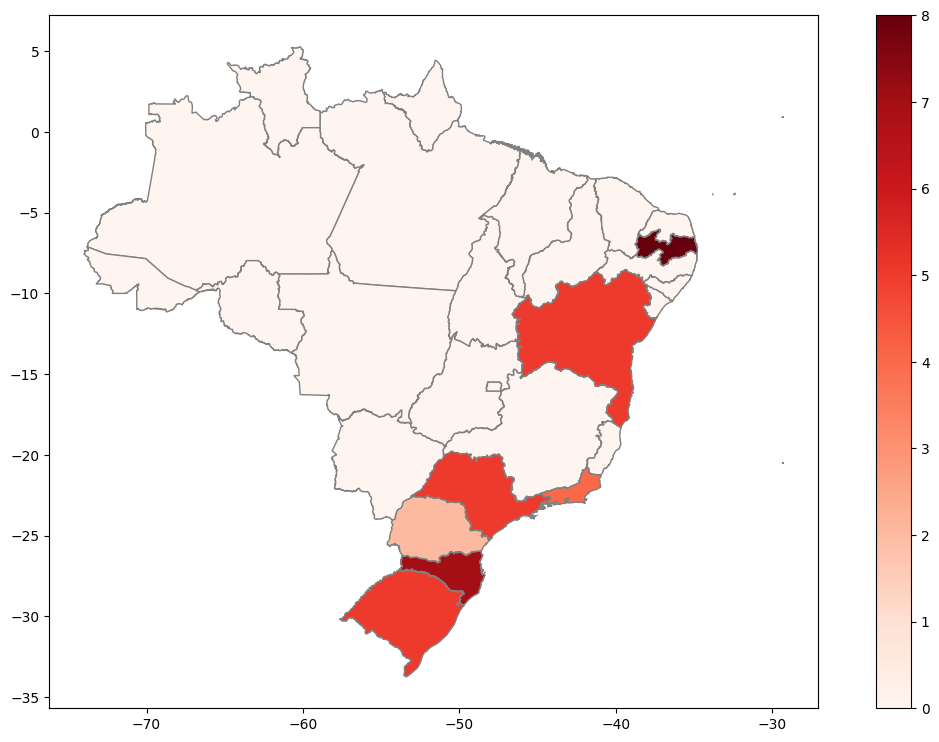

In [14]:
%matplotlib inline

Brasil.plot(column = 'Contagem',cmap =  'Reds', figsize= (15,9), legend= True, edgecolor= 'gray') # Montagem do gráfico.


A distribuição no Brasil por região: 

* Região Sul = 15
    * Santa Catarina = 7
    * Rio Grande do Sul = 5
    * Paraná = 2
* Região Nordeste = 13
    * Paraíba = 8
    * Bahia = 5
* Região Sudeste = 9
    * São Paulo = 5
    * Rio de Janeiro = 4

Sendo assim, é notável que a região com a maior densidade de consumidores é a região sul do país e sendo em potencial o melhor publico. O mercado no nordeste não é fraco e poderia ser expandido já que os produtos são bem recebidos na Paraíba e Bahia. Já no sudeste o mercado pode se popularizar pela alta densidade que ambos estados possuem e um mercado bem movimentado economicamente.

---
# Somando a quantidade de vendas por produto e renomeando as colunas.

In [15]:
# Agrupa com base no 'PRODUTO' e calcula a soma de 'QUANTIDADE_VENDIDA' para cada produto
sum_sales = sales_df.groupby('PRODUTO')['QUANTIDADE_VENDIDA'].sum().reset_index()

# Renomeia as colunas para os nomes desejados
sum_sales.rename(columns={'PRODUTO': 'Produto', 'QUANTIDADE_VENDIDA': 'Vendas'}, inplace=True)

sum_sales.head()


,Produto,Vendas
0,A,1850
1,B,1844
2,C,2372
3,D,2119
4,E,1533


---
# *Gráfico com as vendas de cada produto*.

Com as informações anteriores é possivel realizar a montagem de um gráfico com a relação Produto / Vendas, observando-o é possivel perceber que o produto mais vendido foi o produto C e o menos vendido foi o produto E.

A seguir,uma lista decrescente dos produtos em relação as suas vendas:
* C = 2372
* D = 2119
* A = 1850
* B = 1844 
* E = 1533

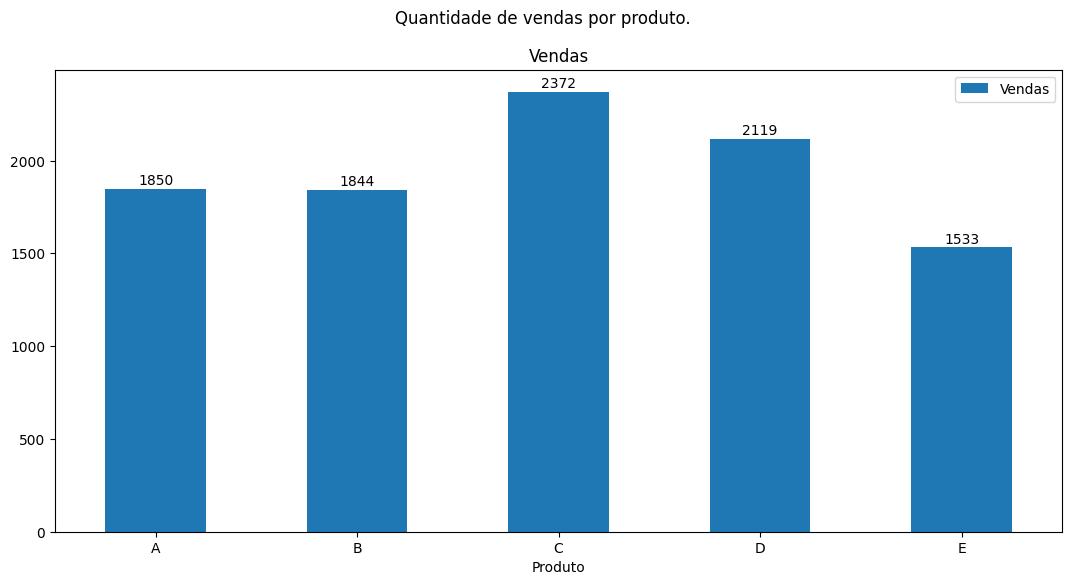

In [18]:
sales_plot = sum_sales.plot.bar(x='Produto', y='Vendas',figsize=(13,6), rot=0, subplots=True, title='Quantidade de vendas por produto.')

for ax in sales_plot:
    for bar in ax.patches:
        height = bar.get_height()
        x, y = bar.get_xy()
        ax.annotate('{}'.format(height), (x + bar.get_width() / 2, y + height + 20), ha='center')

plt.show()

---
# Calculando vendas por mês e seu gráfico.

In [19]:
# Soma as vendas com base no mês
sum_salespermonth = sales_df.groupby('Mes')['QUANTIDADE_VENDIDA'].sum().reset_index()

# Renomear as coluna
sum_salespermonth.rename({'DATA':'Mes','QUANTIDADE_VENDIDA':'Vendas'}, axis=1, inplace = True)
sum_salespermonth

,Mes,Vendas
0,1,1742
1,2,1201
2,3,1169
3,4,1252
4,5,1100
5,6,51
6,7,396
7,8,2000
8,9,807


---


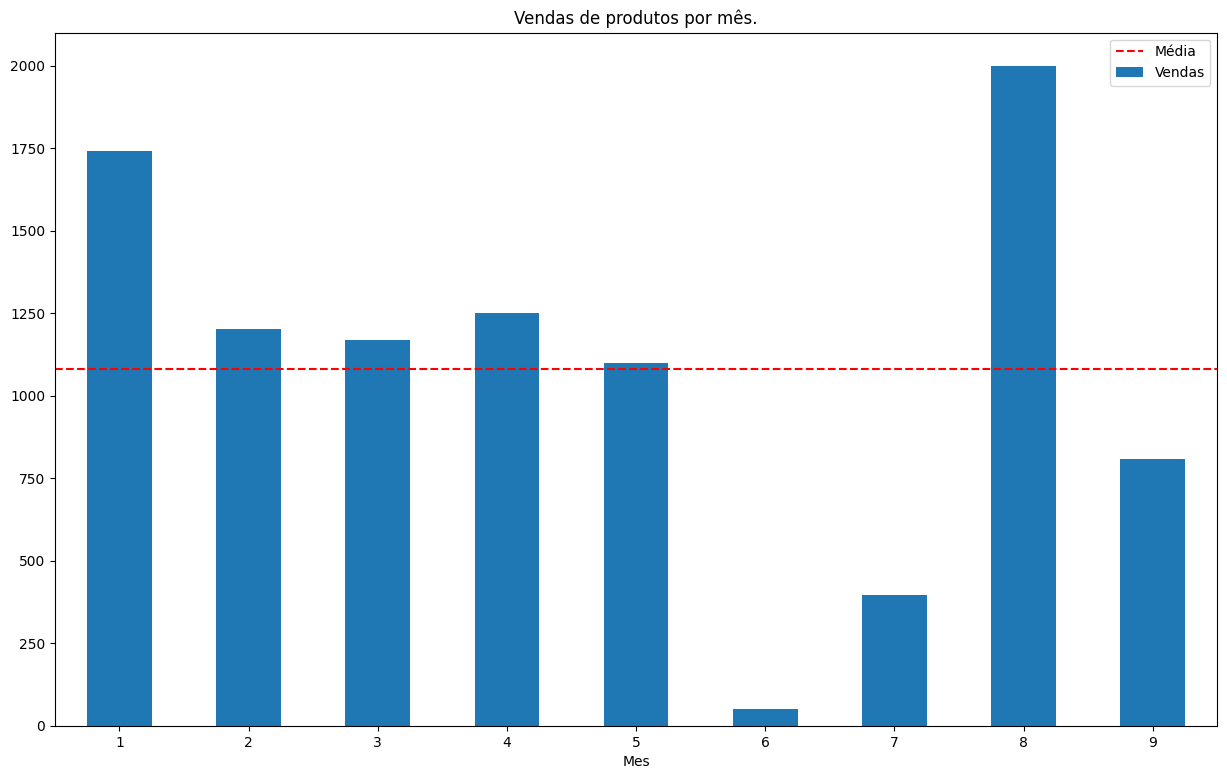

In [20]:
# Cria a plot das vendas por mês
month_sales = sum_salespermonth.plot.bar(x='Mes', y='Vendas', rot=0, title='Vendas de produtos por mês.',figsize=(15,9))

# Descobre a média das vendas.
average_value = sum_salespermonth['Vendas'].mean()

# Adiciona uma linha da média
month_sales.axhline(average_value, color='red', linestyle='--', label='Média') 

# Insere a legenda 
month_sales.legend()



---
